# 12.2 Assignment ~ Term Project

In [1]:
# import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from colorspacious import cspace_converter
import scipy.stats
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/Users/aliss/OneDrive - Bellevue University/DSC530/Final Project/
                 'GlobalTemperatures.csv')
#df = df.dropna()
df['dt'] = pd.to_datetime(df['dt'])

# convert temps from celsius to farenheit
df['LandAverageTemperature'] = df['LandAverageTemperature']*1.8+32
df['LandMaxTemperature'] = df['LandMaxTemperature']*1.8+32
df['LandMinTemperature'] = df['LandMinTemperature']*1.8+32
df['LandAndOceanAverageTemperature'] = df['LandAndOceanAverageTemperature']*1.8+32

df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,37.4612,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,37.5494,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,42.1268,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,47.2820,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,52.8314,2.072,NaN,NaN,NaN,NaN,NaN,NaN


#### Select a minimum of 5 variables in your dataset used during your analysis. Consider what you think could have an impact on your question, and describe what the 5 variables mean in the dataset (Chapter 1).

**dt** is the date each temperature was recorded (year-month-day).  
**LandAverageTemperature** is the average land temperature ($^\circ$F). 
**LandAverageTemperatureUncertainty** is the uncertainty of each temperature (%).  
**LandMaxTemperature** is the maximum temperature recorded ($^\circ$F).  
**LandMinTemperature** is the minimum temperature recorded ($^\circ$F).  
**LandAndOceanAverageTemperature** is the average land and ocean temperature ($^\circ$F). 

In [3]:
#df['Year'] = df['dt'].dt.strftime('%Y')
temp_df = df[['dt','LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature',
       'LandMinTemperature',
       'LandAndOceanAverageTemperature',]]

temp_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1750-01-01,37.4612,3.574,NaN,NaN,NaN
1,1750-02-01,37.5494,3.702,NaN,NaN,NaN
2,1750-03-01,42.1268,3.076,NaN,NaN,NaN
3,1750-04-01,47.2820,2.451,NaN,NaN,NaN
4,1750-05-01,52.8314,2.072,NaN,NaN,NaN


#### Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

<AxesSubplot: >

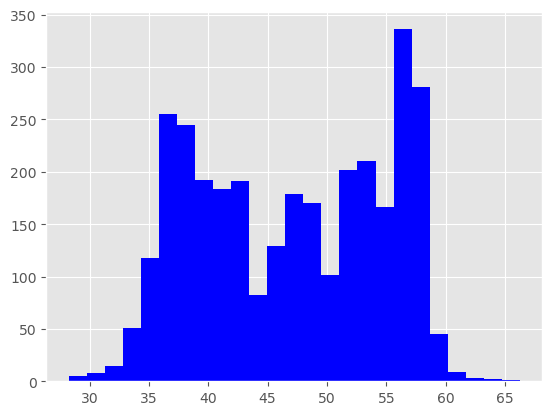

In [4]:
temp_df.LandAverageTemperature.hist(bins=25,color='blue')

<AxesSubplot: >

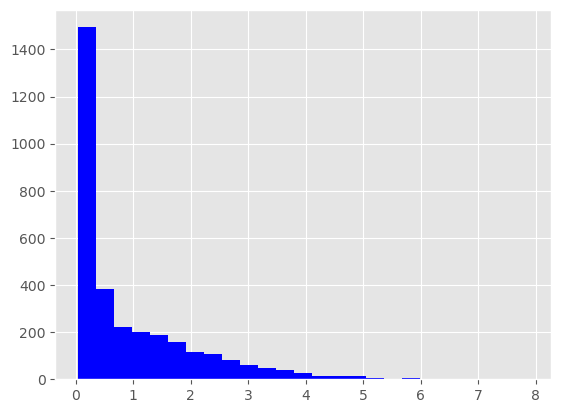

In [5]:
temp_df.LandAverageTemperatureUncertainty.hist(bins=25,color='blue')

<AxesSubplot: >

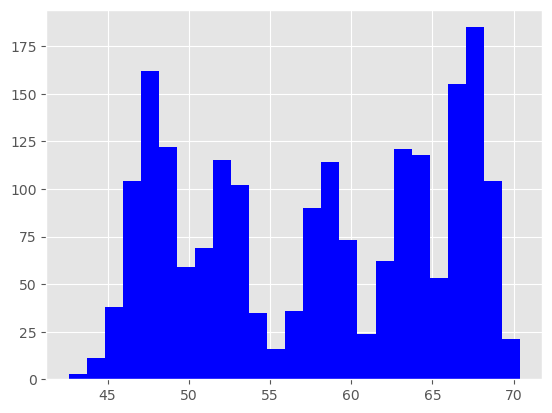

In [6]:
temp_df.LandMaxTemperature.hist(bins=25,color='blue')

<AxesSubplot: >

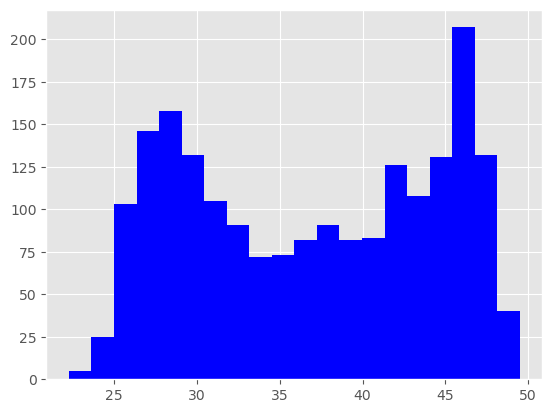

In [7]:
temp_df.LandMinTemperature.hist(bins=20,color='blue')

<AxesSubplot: >

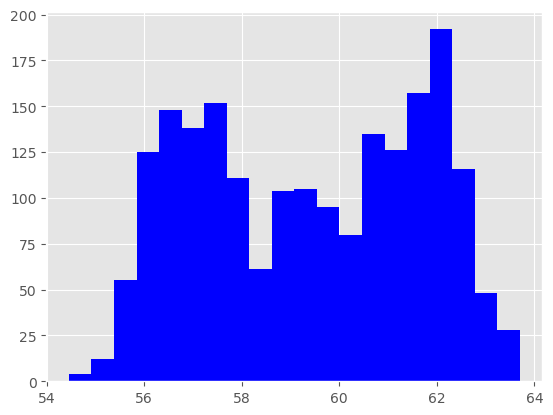

In [8]:
temp_df.LandAndOceanAverageTemperature.hist(bins=20,color='blue')

<AxesSubplot: >

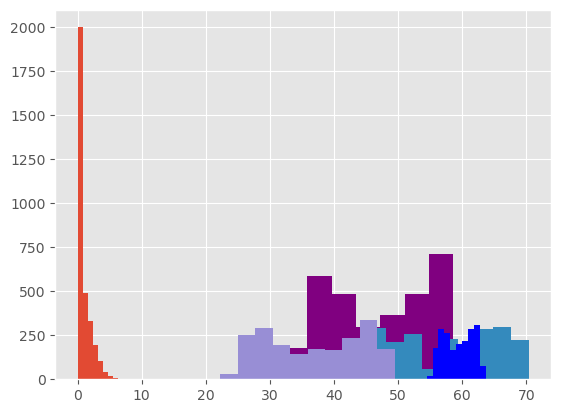

In [9]:
temp_df.LandAverageTemperature.hist(color='purple')
temp_df.LandAverageTemperatureUncertainty.hist()
temp_df.LandMaxTemperature.hist()
temp_df.LandMinTemperature.hist()
temp_df.LandAndOceanAverageTemperature.hist(color='blue')

#### Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [10]:
mean = temp_df.LandAverageTemperature.mean()
mode = temp_df.LandAverageTemperature.mode()
spread = temp_df.LandAverageTemperature.var()
tails = temp_df.LandAverageTemperature.skew()
print("mean = " + str(round(mean, 2)), "\nmode = " + str(mode), 
      "\nspread = " + str(round(spread,2)), "\ntails = " + str(round(tails,2)))

mean = 47.07 
mode = 0    55.9274
1    56.7770
Name: LandAverageTemperature, dtype: float64 
spread = 62.19 
tails = -0.08


In [11]:
mean = temp_df.LandAverageTemperatureUncertainty.mean()
mode = temp_df.LandAverageTemperatureUncertainty.mode()
spread = temp_df.LandAverageTemperatureUncertainty.var()
tails = temp_df.LandAverageTemperatureUncertainty.skew()
print("mean = " + str(round(mean, 2)), "\nmode = " + str(mode), 
      "\nspread = " + str(round(spread,2)), "\ntails = " + str(round(tails,2)))

mean = 0.94 
mode = 0    0.087
Name: LandAverageTemperatureUncertainty, dtype: float64 
spread = 1.2 
tails = 1.78


In [12]:
mean = temp_df.LandMaxTemperature.mean()
mode = temp_df.LandMaxTemperature.mode()
spread = temp_df.LandMaxTemperature.var()
tails = temp_df.LandMaxTemperature.skew()
print("mean = " + str(round(mean, 2)), "\nmode = " + str(mode), 
      "\nspread = " + str(round(spread,2)), "\ntails = " + str(round(tails,2)))

mean = 57.83 
mode = 0     47.3990
1     51.4058
2     52.5398
3     62.9528
4     63.1202
5     63.8834
6     66.8480
7     67.3304
8     67.5554
9     67.7300
10    67.9766
11    68.0666
Name: LandMaxTemperature, dtype: float64 
spread = 60.17 
tails = -0.1


In [13]:
mean = temp_df.LandMinTemperature.mean()
mode = temp_df.LandMinTemperature.mode()
spread = temp_df.LandMinTemperature.var()
tails = temp_df.LandMinTemperature.skew()
print("mean = " + str(round(mean, 2)), "\nmode = " + str(mode), 
      "\nspread = " + str(round(spread,2)), "\ntails = " + str(round(tails,2)))

mean = 36.94 
mode = 0    46.7312
Name: LandMinTemperature, dtype: float64 
spread = 55.96 
tails = -0.05


In [14]:
mean = temp_df.LandAndOceanAverageTemperature.mean()
mode = temp_df.LandAndOceanAverageTemperature.mode()
spread = temp_df.LandAndOceanAverageTemperature.var()
tails = temp_df.LandAndOceanAverageTemperature.skew()
print("mean = " + str(round(mean, 2)), "\nmode = " + str(mode), 
      "\nspread = " + str(round(spread,2)), "\ntails = " + str(round(tails,2)))

mean = 59.38 
mode = 0    59.009
Name: LandAndOceanAverageTemperature, dtype: float64 
spread = 5.26 
tails = -0.06


In [15]:
temp_df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000
mean,47.074516,0.938468,57.831082,36.938472,59.382618
std,7.886358,1.096440,7.757242,7.480504,2.293367
min,28.256000,0.034000,42.620000,22.267400,54.455000
25%,39.761600,0.186750,50.381600,29.597900,57.284600
50%,47.498900,0.392000,58.568000,37.309100,59.451800
75%,54.586850,1.419250,65.212700,44.201750,61.513250
max,66.237800,7.880000,70.376000,49.487000,63.699800


In [16]:
tails = temp_df.skew(numeric_only=True)
tails

LandAverageTemperature              -0.081426
LandAverageTemperatureUncertainty    1.780597
LandMaxTemperature                  -0.096938
LandMinTemperature                  -0.050255
LandAndOceanAverageTemperature      -0.056049
dtype: float64

#### Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario, almost like a filter (Chapter 3).

In [17]:
pmf = thinkstats2.Pmf(temp_df.LandAverageTemperature)
pmf.Total(), pmf.Mean()

(1.000000000000088, 47.074516037736)

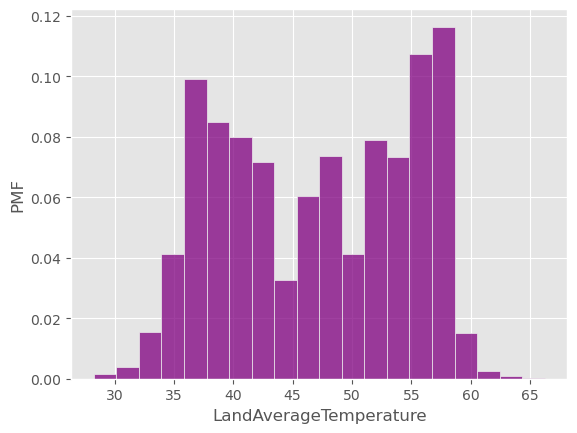

In [18]:
plt.ylabel('PMF')
sns.histplot(temp_df.LandAverageTemperature, stat='probability', color='purple', 
             bins=20);

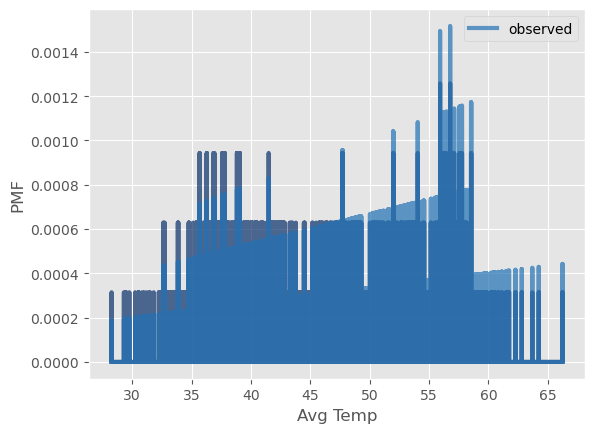

<Figure size 800x600 with 0 Axes>

In [19]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    new_pmf.Normalize()
    return new_pmf

biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='Avg Temp', ylabel='PMF')

<AxesSubplot: ylabel='Density'>

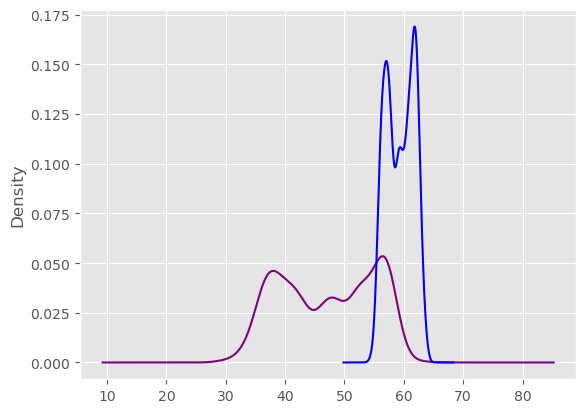

In [20]:
temp_df.LandAverageTemperature.plot(kind="density", color='purple')
temp_df.LandAndOceanAverageTemperature.plot(kind="density", color='blue')

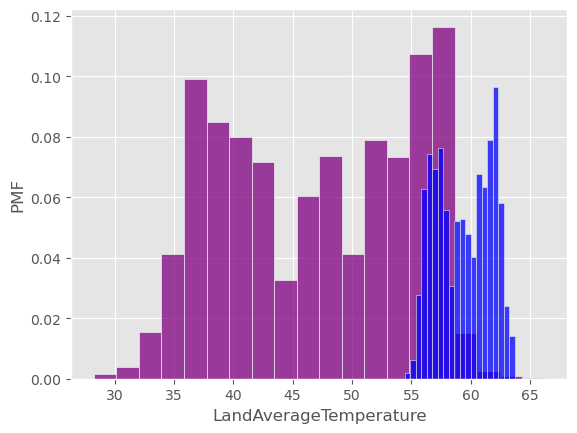

In [21]:
plt.ylabel('PMF')
sns.histplot(temp_df.LandAverageTemperature, stat='probability', color='purple', 
             bins=20)
sns.histplot(temp_df.LandAndOceanAverageTemperature, stat='probability', color='blue', 
             bins=20);

#### Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

In [22]:
land_temp = temp_df.LandAverageTemperature
land_temp_dropna = land_temp.dropna()
print(len(land_temp), len(land_temp_dropna))

temp_pmf = thinkstats2.Pmf(land_temp_dropna)

3192 3180


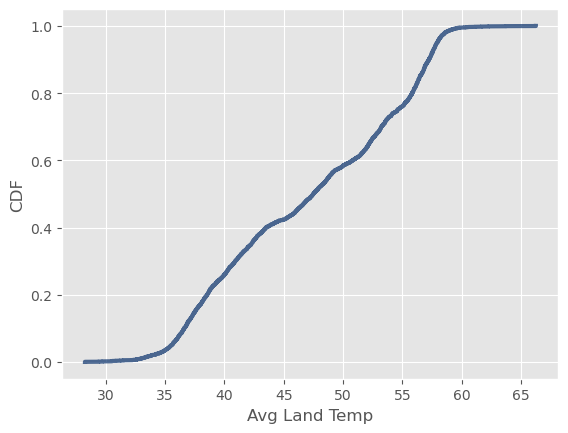

<Figure size 800x600 with 0 Axes>

In [23]:
def EvalCdf(temp_df, LandAverageTemperature):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

cdf = thinkstats2.Cdf(temp_df.LandAverageTemperature)
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Avg Land Temp', ylabel='CDF')

This CDF of average land temperature shows us that there are few values lower than 35 degrees F or higher than 58 degrees F. The mode between 55 and 56 degrees F is also apparent.

#### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

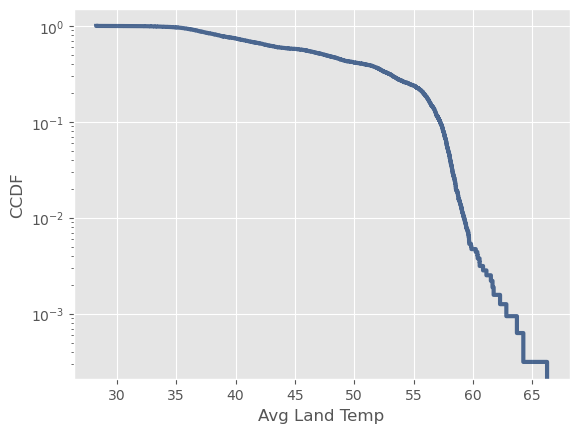

<Figure size 800x600 with 0 Axes>

In [24]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel='Avg Land Temp', ylabel='CCDF', yscale='log')

We can plot the complementary CDF, which is 1 − CDF(x), on a
log-y scale to check the data for an exponential distribution. If so, the result is a straight line. Since this is not a straight line, we can make the assumption that temperatures did not increase at an exponential rate, and the exponential distribtion is not a perfect model for this data.

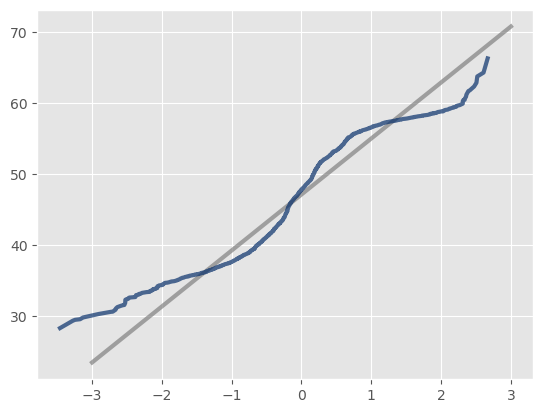

In [25]:
def MakeNormalPlot(x):
    mean = temp_df.LandAverageTemperature.mean()
    std = temp_df.LandAverageTemperature.std()

    xs = [-3, 3]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')
        
    xs, ys = thinkstats2.NormalProbability(temp_df.LandAverageTemperature)
    thinkplot.Plot(xs, ys, label='Avg Temp')

MakeNormalPlot(temp_df.LandAverageTemperature)


#### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

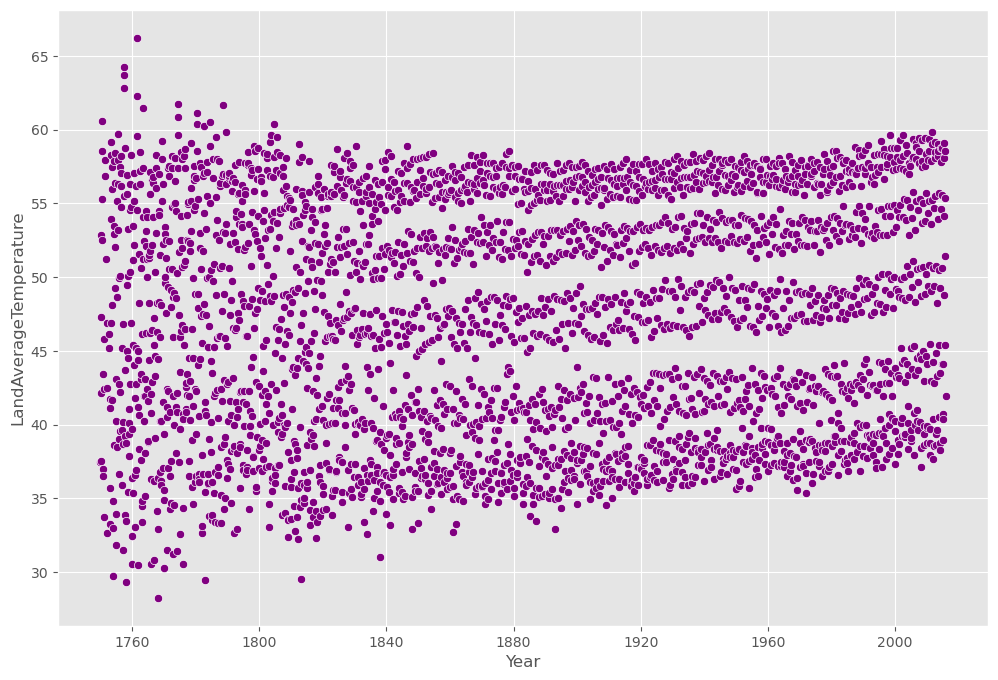

In [26]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=df, x='dt', y='LandAverageTemperature', color='purple')

plt.xlabel('Year')
plt.show()

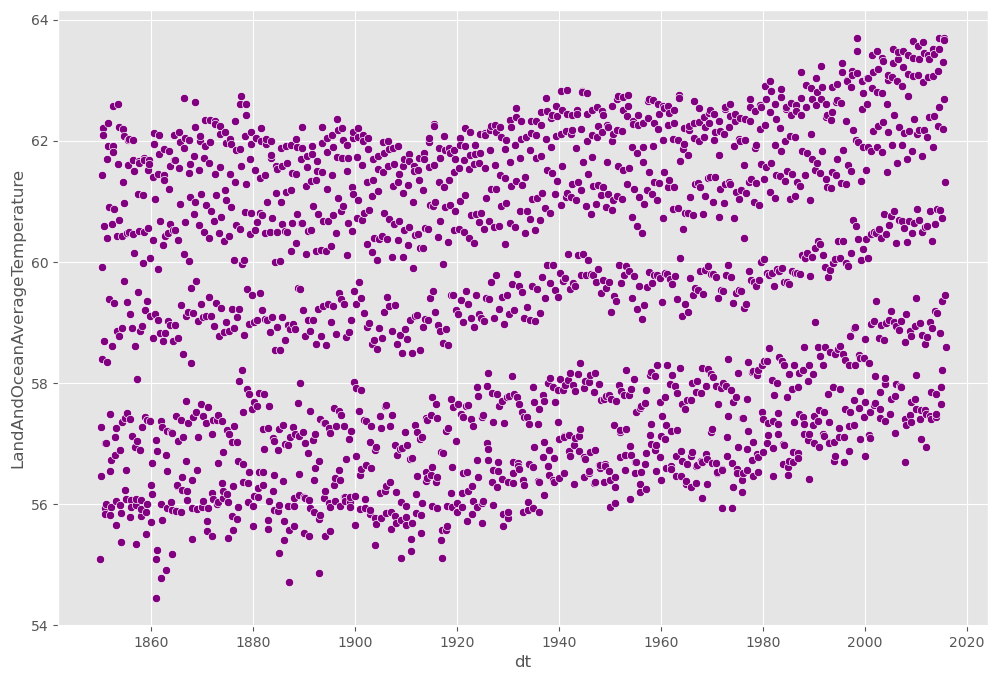

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='dt', y='LandAndOceanAverageTemperature', color='purple')
plt.show()

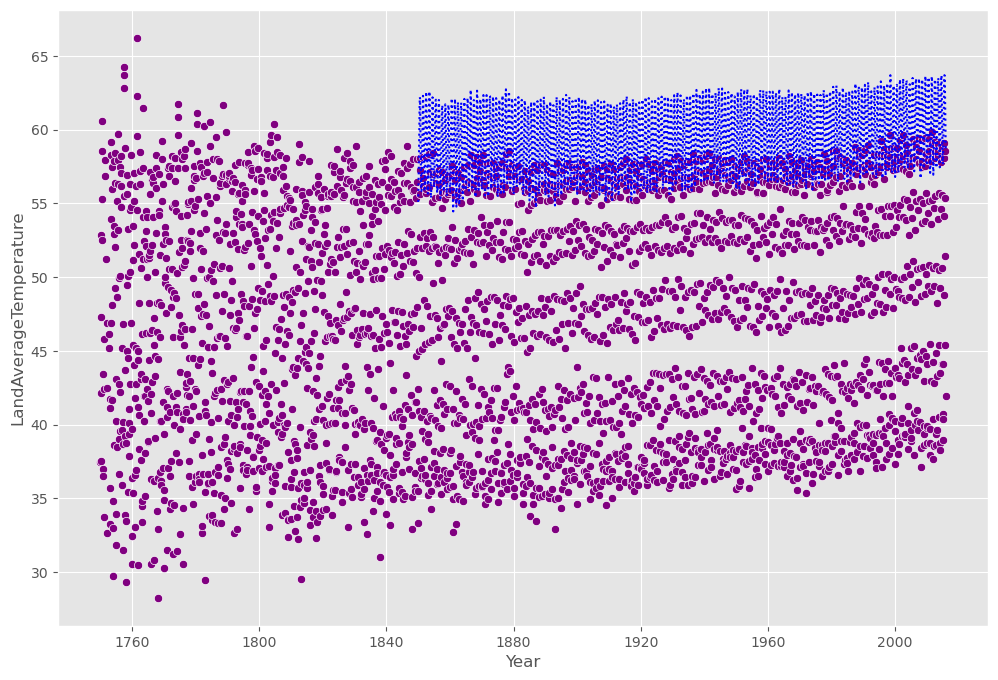

In [28]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=df, x='dt', y='LandAverageTemperature', color='purple')
sns.lineplot(data=df, x='dt', y='LandAndOceanAverageTemperature', color='Blue', 
             linestyle=':')

plt.xlabel('Year')
plt.show()

C:\Users\aliss\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


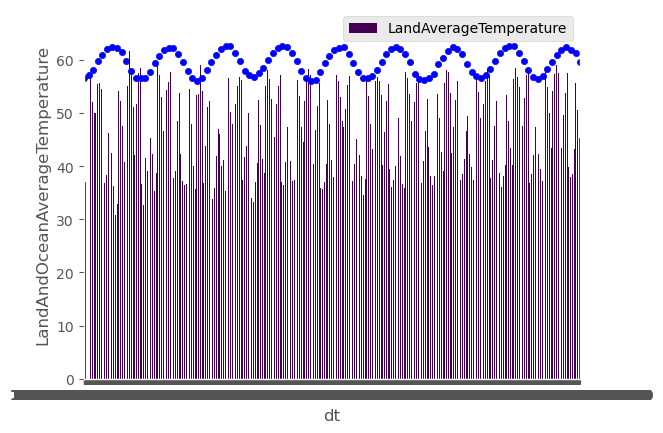

In [29]:
ax = plt.gca()

temp_df.plot(kind='bar',x='dt',y='LandAverageTemperature', cmap='viridis', ax=ax)
temp_df.plot(kind='scatter',x='dt',y='LandAndOceanAverageTemperature', color= 
             'blue', ax=ax)

plt.show()

In [30]:
temp_df = temp_df.dropna()

print("Covariance:")
np.cov(temp_df.LandAverageTemperature, temp_df.LandAndOceanAverageTemperature)

Covariance:


array([[58.88639021, 17.38868956],
       [17.38868956,  5.25953366]])

In [31]:
print("Pearson Correlation Coefficient:")
scipy.stats.pearsonr(temp_df.LandAverageTemperature, 
                     temp_df.LandAndOceanAverageTemperature)

Pearson Correlation Coefficient:


PearsonRResult(statistic=0.988065575554971, pvalue=0.0)

#### Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [32]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()
        
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

data = temp_df.LandAverageTemperature.values, 
       temp_df.LandAndOceanAverageTemperature.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [33]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

cleaned = temp_df.dropna(subset=['LandAverageTemperature', 
                                 'LandAndOceanAverageTemperature'])
data = cleaned.LandAverageTemperature.values, 
       cleaned.LandAndOceanAverageTemperature.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [34]:
ht.actual, ht.MaxTestStat()

(0.9880655755549708, 0.06486833760459351)

In [35]:
def FalseNegRate(data, num_runs=1000):
    """Computes the chance of a false negative based on resampling.

    data: pair of sequences
    num_runs: how many experiments to simulate

    returns: float false negative rate
    """
    group1, group2 = data
    count = 0

    for i in range(num_runs):
        sample1 = thinkstats2.Resample(group1)
        sample2 = thinkstats2.Resample(group2)
        ht = DiffMeansPermute((sample1, sample2))
        p_value = ht.PValue(iters=101)
        if p_value > 0.05:
            count += 1

    return count / num_runs

neg_rate = FalseNegRate(data)
neg_rate

0.0

#### Conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [39]:
formula = 'LandAverageTemperature ~ LandAndOceanAverageTemperature'
model = smf.ols(formula, data=temp_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     LandAverageTemperature   R-squared:                       0.976
Model:                                OLS   Adj. R-squared:                  0.976
Method:                     Least Squares   F-statistic:                 8.188e+04
Date:                    Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                            15:50:42   Log-Likelihood:                -3159.1
No. Observations:                    1992   AIC:                             6322.
Df Residuals:                        1990   BIC:                             6333.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       -148.8977      0.687   -216.861      0.000    -150.244    -147.551
LandAndOceanAverageTemperature     3.3061      0.012    286.152      0.000       3.283       3.329
==============================================================================
Omnibus:                       41.897   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.275
Skew:                          -0.269   Prob(JB):                     1.33e-08
Kurtosis:                       2.615   Cond. No.                     1.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
formula = 'LandAverageTemperature ~ LandAndOceanAverageTemperature + 
          'LandAverageTemperatureUncertainty'
results = smf.ols(formula, data=temp_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     LandAverageTemperature   R-squared:                       0.980
Model:                                OLS   Adj. R-squared:                  0.980
Method:                     Least Squares   F-statistic:                 4.960e+04
Date:                    Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                            15:56:14   Log-Likelihood:                -2971.7
No. Observations:                    1992   AIC:                             5949.
Df Residuals:                        1989   BIC:                             5966.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          -152.2113      0.646   -235.589      0.000    -153.478    -150.944
LandAndOceanAverageTemperature        3.3515      0.011    311.647      0.000       3.330       3.373
LandAverageTemperatureUncertainty     2.2340      0.110     20.292      0.000       2.018       2.450
==============================================================================
Omnibus:                        7.999   Durbin-Watson:                   0.335
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.187
Skew:                          -0.096   Prob(JB):                       0.0275
Kurtosis:                       2.777   Cond. No.                     1.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Summary

#### Statistical/Hypothetical Question

Do increases in land or ocean temperatures drive the other? Are we able to gain any significant insight into climate change from the analysis?

#### Outcome of your EDA

Despite the uncertainty of early measurements, we can see notable increases in both land and ocean temperatures over time. However, in trying to determine correlation and causality, our hypothesis testing proved these variables to not be signficantly related statistically. 

#### What do you feel was missed during the analysis?

There was very little data available in the data set regarding other outside factors that may contribute to the temperature increase or better link land and ocean temperatures together. There was also a lot of missing data throughout, specifically in available ocean temperatures.

#### Were there any variables you felt could have helped in the analysis?

Anything related to the land/air/ocean where measurements were taken, or possibly a deeper dive into related socioeconomic activities (Industrial Revolution, etc) that could've provided additional insight to outliers.

#### Were there any assumptions made you felt were incorrect?

I thought that the ocean temperature would be more significantly correlated to land temperature, as air movement and moisture from the ocean have significant effects on the surrounding areas.

#### What challenges did you face, what did you not fully understand?

Trying to link the two variables proved more challenging the more I manipulated and continued finding limitations in the available data. There was also very high multicollinearity between the variables, but I think this had more to do with a poor choice of data set than their actual relationships to each other. The only things this really tells us is that both temperatures have increased over time (not shocking).  

Because our p values were all 0, we know none of the variables have statistically significant impacts on our models once included, as both land and ocean temperatures appear to convey basically the same thing, and the only other data we had to go off of was uncertainty and time.